In [1]:
!rm -rf /Users/gil-arnaudcoche/Documents/ijoutaku/data/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/*_gt

zsh:1: no matches found: /Users/gil-arnaudcoche/Documents/ijoutaku/data/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/*_gt


In [2]:
import sys
sys.path.insert(0, '/Users/gil-arnaudcoche/Documents/ijoutaku/')

import time
import keras
import numpy as np
import matplotlib.pyplot as plt

from config.paths import TEST_PATH
from config.paths import MODELS_PATH

from lib.generators import SequenceDataGenerator
from lib.generators import ForwardDataGenerator

In [3]:
LSTM_CONVOLUTIONAL_AUTOENCODER = f'{MODELS_PATH}lstm-convolutional-autoencoder.hdf5'
LSTM_CONVOLUTIONAL_AUTOENCODER_FORWARD = f'{MODELS_PATH}lstm-convolutional-autoencoder-forward.hdf5'
LSTM_AUTOENCODER_FORWARD = f'{MODELS_PATH}lstm-autoencoder-forward.hdf5'

In [4]:
lstm_convolutional_autoencoder = keras.models.load_model(LSTM_CONVOLUTIONAL_AUTOENCODER)
lstm_convolutional_autoencoder_forward = keras.models.load_model(LSTM_CONVOLUTIONAL_AUTOENCODER_FORWARD)
lstm_autoencoder_forward = keras.models.load_model(LSTM_AUTOENCODER_FORWARD)

In [5]:
sequence_test_set = SequenceDataGenerator(TEST_PATH)
forward_test_set = ForwardDataGenerator(TEST_PATH)

In [6]:
mse = keras.losses.MeanSquaredError()

1/1 [==============================] - 1s 963ms/step


Text(0.5, 0, 'time in sequence')

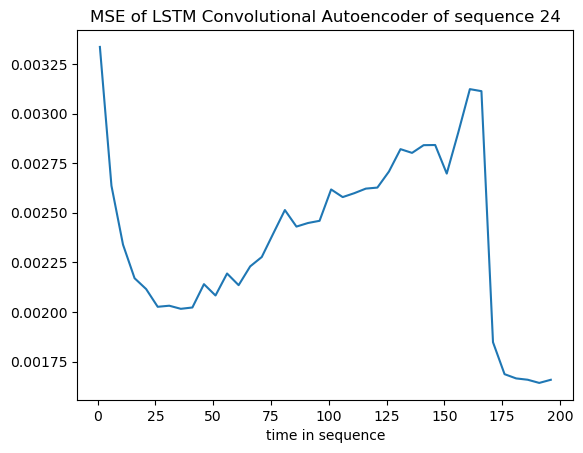

In [7]:
b = 38
sequence = sequence_test_set[b]
x = sequence[0][:, :, :, :, :]
x_predict = lstm_convolutional_autoencoder.predict(x)
mse_values = np.zeros(x.shape[1])
for t in range(x.shape[1]):
    mse_values[t] = mse(x[1, t, :, :, 0], x_predict[1, t, :, :, 0])
plt.title('MSE of LSTM Convolutional Autoencoder of sequence 24')
plt.plot(1 + np.arange(0, SequenceDataGenerator._SEQUENCE_SIZE, SequenceDataGenerator._STRIDE_KERNEL), mse_values)
plt.xlabel('time in sequence')

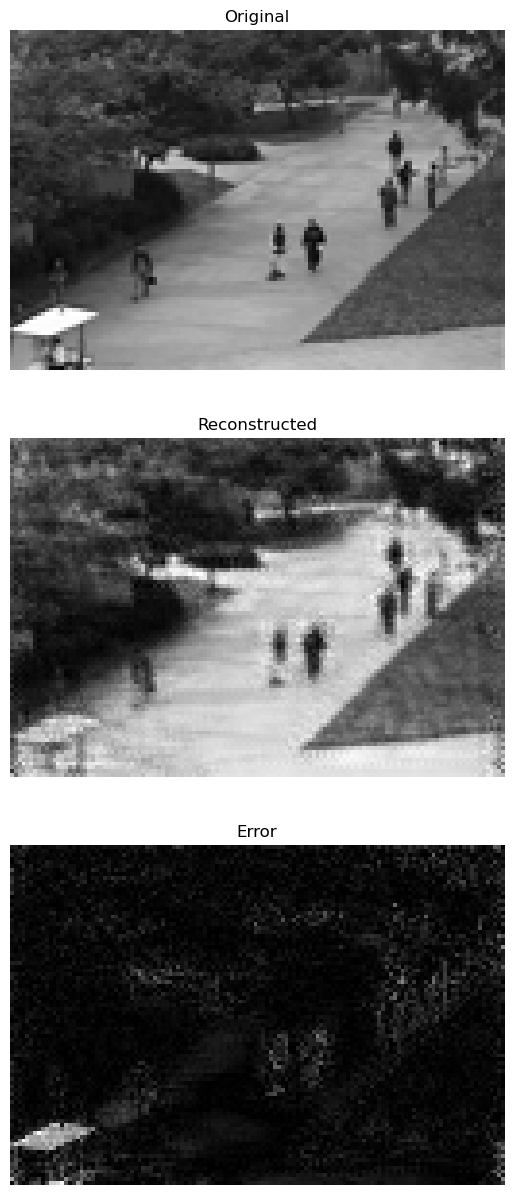

In [8]:
n = 33
img = x[1, n, :, :, 0]
img_predict = x_predict[1, n, :, :, 0]
plt.figure(figsize=(10, 15))
plt.subplot(311)
plt.title('Original')
plt.imshow(img, cmap='gray')
plt.gca().set_axis_off()
plt.subplot(312)
plt.title('Reconstructed')
plt.imshow(img_predict, cmap='gray')
plt.gca().set_axis_off()
plt.subplot(313)
plt.title('Error')
plt.imshow(np.abs(img - img_predict), cmap='gray')
plt.gca().set_axis_off()

1/1 [==============================] - 1s 839ms/step


Text(0.5, 0, 'time in sequence')

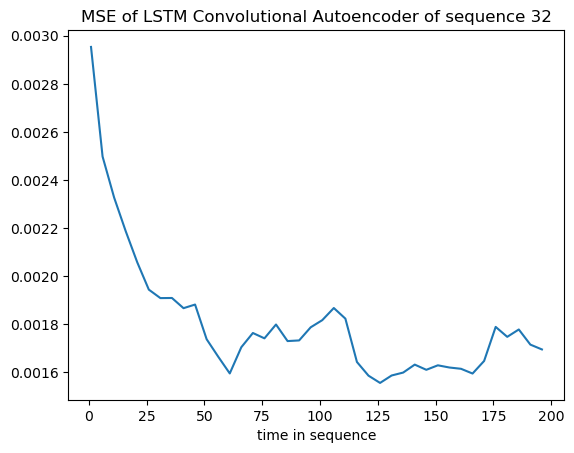

In [9]:
b = 52
x = sequence_test_set[b][0][:, :, :, :, :]
x_predict = lstm_convolutional_autoencoder.predict(x)
mse_values = np.zeros(x.shape[1])
for t in range(x.shape[1]):
    mse_values[t] = mse(x[1, t, :, :, 0], x_predict[1, t, :, :, 0])
plt.title('MSE of LSTM Convolutional Autoencoder of sequence 32')
plt.plot(1 + np.arange(0, SequenceDataGenerator._SEQUENCE_SIZE, SequenceDataGenerator._STRIDE_KERNEL), mse_values)
plt.xlabel('time in sequence')

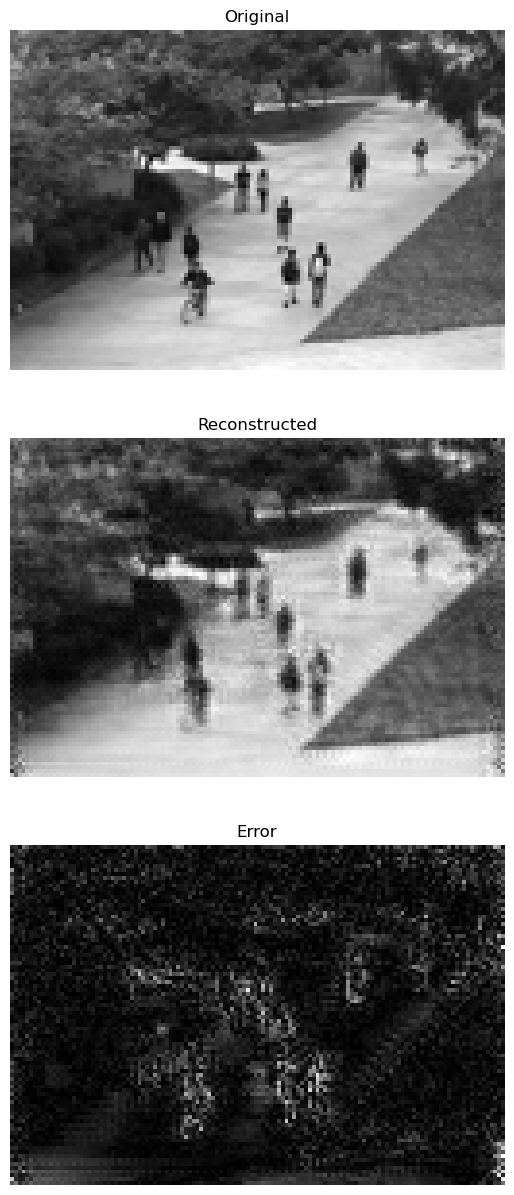

In [10]:
n = 20
img = x[1, n, :, :, 0]
img_predict = x_predict[1, n, :, :, 0]
plt.figure(figsize=(10, 15))
plt.subplot(311)
plt.title('Original')
plt.imshow(img, cmap='gray')
plt.gca().set_axis_off()
plt.subplot(312)
plt.title('Reconstructed')
plt.imshow(img_predict, cmap='gray')
plt.gca().set_axis_off()
plt.subplot(313)
plt.title('Error')
plt.imshow(np.abs(img - img_predict), cmap='gray')
plt.gca().set_axis_off()

Text(0.5, 0, 'time in sequence')

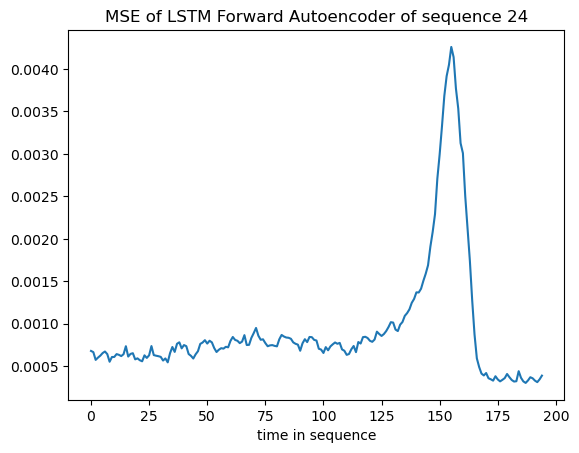

In [11]:
mse_values = np.zeros(195)
p = 0
for n in range(23*65, 24*65):
    X, y = forward_test_set[n]
    y_predict = lstm_autoencoder_forward(X)
    for k in range(y.shape[0]):
        mse_values[p] = mse(y[k, :, :, :], y_predict[k, :, :, :])
        p += 1
plt.title('MSE of LSTM Forward Autoencoder of sequence 24')
plt.plot(mse_values)
plt.xlabel('time in sequence')

Text(0.5, 0, 'time in sequence')

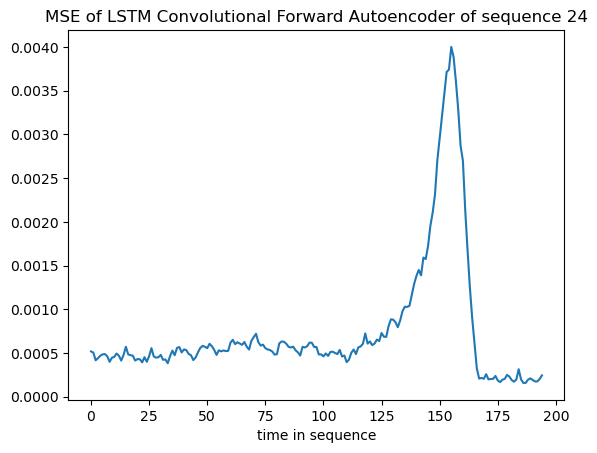

In [12]:
mse_values = np.zeros(195)
p = 0
for n in range(23*65, 24*65):
    X, y = forward_test_set[n]
    y_predict = lstm_convolutional_autoencoder_forward(X)
    for k in range(y.shape[0]):
        mse_values[p] = mse(y[k, :, :, :], y_predict[k, :, :, :])
        p += 1
plt.title('MSE of LSTM Convolutional Forward Autoencoder of sequence 24')
plt.plot(mse_values)
plt.xlabel('time in sequence')

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


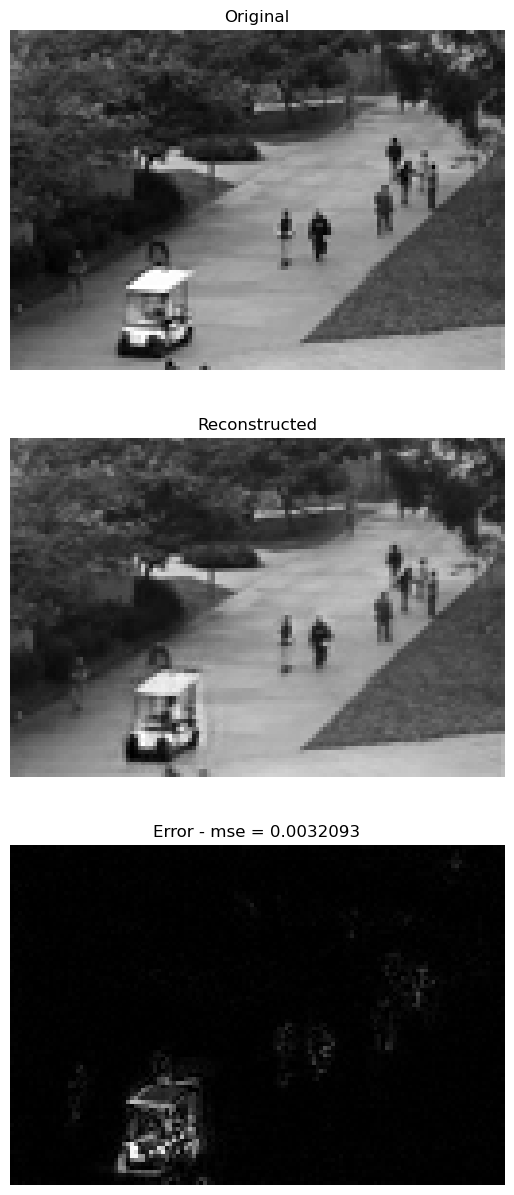

In [13]:
n = 23*65 + 50
X, y = forward_test_set[n]
y_predict = lstm_convolutional_autoencoder_forward(X)
img = y[0, :, :, 0]
img_predict = y_predict[0, :, :, 0]
plt.figure(figsize=(15, 15))
plt.subplot(311)
plt.title('Original')
plt.imshow(img, cmap='gray')
plt.gca().set_axis_off()
plt.subplot(312)
plt.title('Reconstructed')
plt.gca().set_axis_off()
plt.imshow(img_predict, cmap='gray')
plt.subplot(313)
plt.title(f'Error - mse = {int(1e7*mse(y, y_predict))/1e7}')
plt.imshow(np.abs(img - img_predict), cmap='gray')
plt.gca().set_axis_off()

Text(0.5, 0, 'time in sequence')

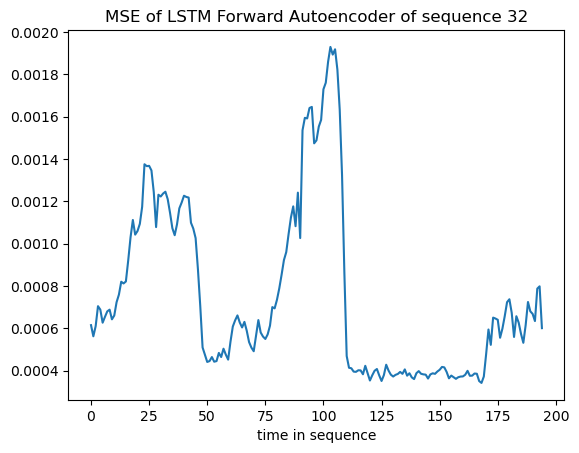

In [14]:
mse_values = np.zeros(195)
p = 0
for n in range(2015, 2080):
    X, y = forward_test_set[n]
    y_predict = lstm_autoencoder_forward(X)
    for k in range(y.shape[0]):
        mse_values[p] = mse(y[k, :, :, :], y_predict[k, :, :, :])
        p += 1
plt.title('MSE of LSTM Forward Autoencoder of sequence 32')
plt.plot(mse_values)
plt.xlabel('time in sequence')

Text(0.5, 0, 'time in sequence')

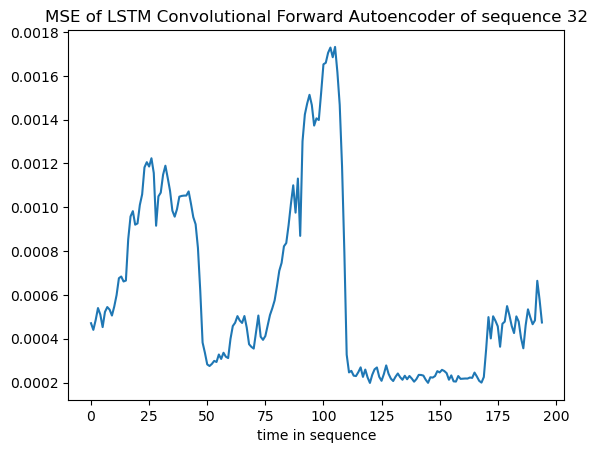

In [15]:
mse_values = np.zeros(195)
p = 0
for n in range(2015, 2080):
    X, y = forward_test_set[n]
    y_predict = lstm_convolutional_autoencoder_forward(X)
    for k in range(y.shape[0]):
        mse_values[p] = mse(y[k, :, :, :], y_predict[k, :, :, :])
        p += 1
plt.title('MSE of LSTM Convolutional Forward Autoencoder of sequence 32')
plt.plot(mse_values)
plt.xlabel('time in sequence')

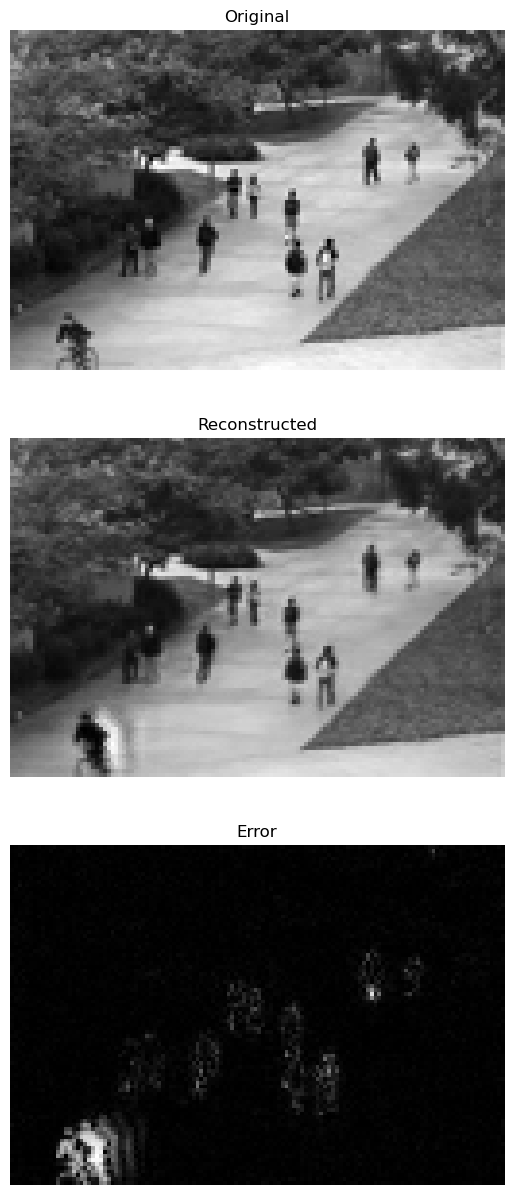

In [16]:
n = 2050
X, y = forward_test_set[n]
y_predict = lstm_convolutional_autoencoder_forward(X)
img = y[0, :, :, 0]
img_predict = y_predict[0, :, :, 0]
plt.figure(figsize=(15, 15))
plt.subplot(311)
plt.title('Original')
plt.imshow(img, cmap='gray')
plt.gca().set_axis_off()
plt.subplot(312)
plt.title('Reconstructed')
plt.gca().set_axis_off()
plt.imshow(img_predict, cmap='gray')
plt.subplot(313)
plt.title('Error')
plt.imshow(np.abs(img - img_predict), cmap='gray')
plt.gca().set_axis_off()